In [2]:
from google.colab import files
import zipfile
import pandas as pd

# 2. Загрузка архива вручную (откроется окно выбора файла)
uploaded = files.upload()

Saving globalpowerplantdatabasev130.zip to globalpowerplantdatabasev130.zip


In [4]:
with zipfile.ZipFile("globalpowerplantdatabasev130.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
df = pd.read_csv("global_power_plant_database.csv")
df.head()

<ipython-input-5-630096db02e3>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_power_plant_database.csv")


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


CLEANING

In [7]:
# Количество дубликатов в df (полностью совпадающих строк)
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


unique ID

In [9]:
num_unique_ids = df['gppd_idnr'].nunique()
total_rows = len(df)

print(f"Total rows: {total_rows}")
print(f"Unique IDs in 'gppd_idnr': {num_unique_ids}")

if num_unique_ids == total_rows:
    print("Все ID уникальны — отлично!")
else:
    print(f"Есть дубликаты ID — их количество: {total_rows - num_unique_ids}")


Total rows: 34936
Unique IDs in 'gppd_idnr': 34936
Все ID уникальны — отлично!


In [10]:
missing = df.isnull().sum()
print("🔍 Пропущенные значения:\n", missing)

🔍 Пропущенные значения:
 country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_

Remove columns with a very large number of gaps and
Remove columns with >90% gaps

In [11]:
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

other_fuel3                       99.736661
other_fuel2                       99.209984
other_fuel1                       94.435539
generation_gwh_2013               81.632127
generation_gwh_2014               79.316464
generation_gwh_2015               76.519922
generation_gwh_2016               73.826425
generation_gwh_2017               72.807419
generation_gwh_2018               72.415274
generation_gwh_2019               72.352301
generation_data_source            67.368903
year_of_capacity_data             57.387795
estimated_generation_gwh_2013     53.858484
wepp_id                           53.532173
estimated_generation_gwh_2014     52.762194
estimated_generation_gwh_2015     51.196474
commissioning_year                50.060110
estimated_generation_gwh_2016     49.708038
owner                             40.267918
estimated_generation_gwh_2017      5.146554
geolocation_source                 1.199336
url                                0.051523
source                          

In [12]:
threshold = 0.9  # 90%
cols_to_drop = missing_percent[missing_percent > threshold * 100].index
df = df.drop(columns=cols_to_drop)

print(f"Удалено колонок: {len(cols_to_drop)}")
print(f"Список удалённых колонок: {list(cols_to_drop)}")


Удалено колонок: 3
Список удалённых колонок: ['other_fuel1', 'other_fuel2', 'other_fuel3']


In [13]:
# Список колонок типа object (строковые, категориальные)
cat_columns = df.select_dtypes(include='object').columns
print("Категориальные колонки:")
print(cat_columns)


Категориальные колонки:
Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner',
       'source', 'url', 'geolocation_source', 'wepp_id',
       'generation_data_source', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


In [14]:
# Пропущенные значения только в категориальных колонках
missing_cat = df[cat_columns].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]

print("Пропуски в категориальных колонках:")
print(missing_cat)


Пропуски в категориальных колонках:
owner                     14068
source                       15
url                          18
geolocation_source          419
wepp_id                   18702
generation_data_source    23536
dtype: int64


In [15]:
cols_to_fill = ['owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'generation_data_source']

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')


In [16]:
print(df[cols_to_fill].isnull().sum())

owner                     0
source                    0
url                       0
geolocation_source        0
wepp_id                   0
generation_data_source    0
dtype: int64


In [17]:
print(df['owner'].value_counts(dropna=False).head(10))

owner
Unknown                         14068
Cypress Creek Renewables          185
Lightsource Renewable Energy      121
Sustainable Power Group  LLC       93
Verbund                            83
Pacific Gas & Electric Co.         81
Tesla Inc.                         73
Erie Boulevard Hydropower LP       71
CFE                                66
100% Vattenfall                    65
Name: count, dtype: int64


In [18]:
print("Оставшиеся пропуски во всех колонках:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Оставшиеся пропуски во всех колонках:
commissioning_year               17489
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64


Step 1: Find the numerical columns

In [19]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Числовые колонки:")
print(num_cols)

Числовые колонки:
Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017'],
      dtype='object')


Шаг 2: Проверим на выбросы, странные значения и статистику

In [20]:
print(df[num_cols].describe())

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.

 заменить отрицательные значения на NaN

In [30]:
import pandas as pd

# Найдём все числовые колонки, где есть слово "generation"
gen_cols = [col for col in df.columns if 'generation_gwh' in col]

# 1. Заменим отрицательные значения на NaN
for col in gen_cols:
    df[col] = df[col].apply(lambda x: x if pd.isna(x) or x >= 0 else None)

# 2. Проверим, остались ли отрицательные значения (для контроля)
for col in gen_cols:
    if (df[col] < 0).sum() > 0:
        print(f"Остались отрицательные значения в {col}")

# 3. Заполним NaN медианой для каждой колонки (вот тут была ошибка)
for col in gen_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)  # <--- правильный способ замены


In [31]:
print(df[gen_cols].isnull().sum())

generation_gwh_2013              0
generation_gwh_2014              0
generation_gwh_2015              0
generation_gwh_2016              0
generation_gwh_2017              0
generation_gwh_2018              0
generation_gwh_2019              0
estimated_generation_gwh_2013    0
estimated_generation_gwh_2014    0
estimated_generation_gwh_2015    0
estimated_generation_gwh_2016    0
estimated_generation_gwh_2017    0
dtype: int64


заполнение медианой

In [29]:
df[col] = df[col].fillna(median_value)

In [32]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,Unknown,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,Unknown,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,Unknown,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,Unknown,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,Unknown,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [33]:
# ✅ Данные очищены
print("✅ Очистка завершена. Размер датафрейма:", df.shape)

✅ Очистка завершена. Размер датафрейма: (34936, 33)


2. Exploratory Data Analysis

In [36]:
# Basic statistics for numerical columns
print(df.describe())

# Distribution by country and fuel type
print(df['country'].value_counts())
print(df['primary_fuel'].value_counts())  # исправлено



        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000         34936.000000         34936.000000   
mean             2018.218849           129.384290           156.059558   
std                 1.606428           957.541366          1046.478846   
min              2000.000000             0.000000             0.

In [35]:
print(df.columns.tolist())

['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']


3. Statistical Analysis

In [39]:
# Calculate mean power output by fuel type
mean_power_by_fuel = df.groupby('primary_fuel')['capacity_mw'].mean()
print("Mean power output by fuel type:")
print(mean_power_by_fuel)

# Example hypothesis test: check if mean of 'Coal' differs from 'Gas'
from scipy.stats import ttest_ind

coal = df[df['primary_fuel'] == 'Coal']['capacity_mw'].dropna()
gas = df[df['primary_fuel'] == 'Gas']['capacity_mw'].dropna()

t_stat, p_value = ttest_ind(coal, gas)
print(f"T-test between Coal and Gas: t = {t_stat:.2f}, p = {p_value:.4f}")


Mean power output by fuel type:
primary_fuel
Biomass             23.972938
Coal               843.579828
Cogeneration        98.731707
Gas                373.449375
Geothermal          67.130952
Hydro              147.171551
Nuclear           2091.855179
Oil                112.878754
Other               84.020000
Petcoke            202.048125
Solar               17.657039
Storage             12.683704
Waste               13.809657
Wave and Tidal      55.220000
Wind                49.224126
Name: capacity_mw, dtype: float64
T-test between Coal and Gas: t = 25.79, p = 0.0000


4. Time Series Analysis

In [43]:
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
df = df.dropna(subset=['commissioning_year']).copy()  # делаем копию, чтобы избежать предупреждений
df['commissioning_year'] = df['commissioning_year'].astype(int)

capacity_per_year = df.groupby('commissioning_year')['capacity_mw'].sum()
print(capacity_per_year)

fuel_year = df.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().unstack()
print(fuel_year.head())



commissioning_year
1896         2.00000
1899         3.20000
1900        88.94000
1901         7.40000
1902        23.50000
            ...     
2016    131759.87754
2017     59285.99000
2018     39522.00000
2019     23711.20000
2020      5696.00000
Name: capacity_mw, Length: 123, dtype: float64
primary_fuel        Biomass  Coal  Cogeneration   Gas  Geothermal  Hydro  \
commissioning_year                                                         
1896                    NaN   NaN           NaN   NaN         NaN    2.0   
1899                    NaN   NaN           NaN   NaN         NaN    3.2   
1900                    NaN   NaN           NaN  61.0         NaN   25.7   
1901                    NaN   NaN           NaN   NaN         NaN    7.4   
1902                    NaN   NaN           NaN   NaN         NaN   23.5   

primary_fuel        Nuclear   Oil  Other  Petcoke  Solar  Storage  Waste  Wind  
commissioning_year                                                              
1896    

<ipython-input-43-b20525e39f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')


5. Advanced Visualization

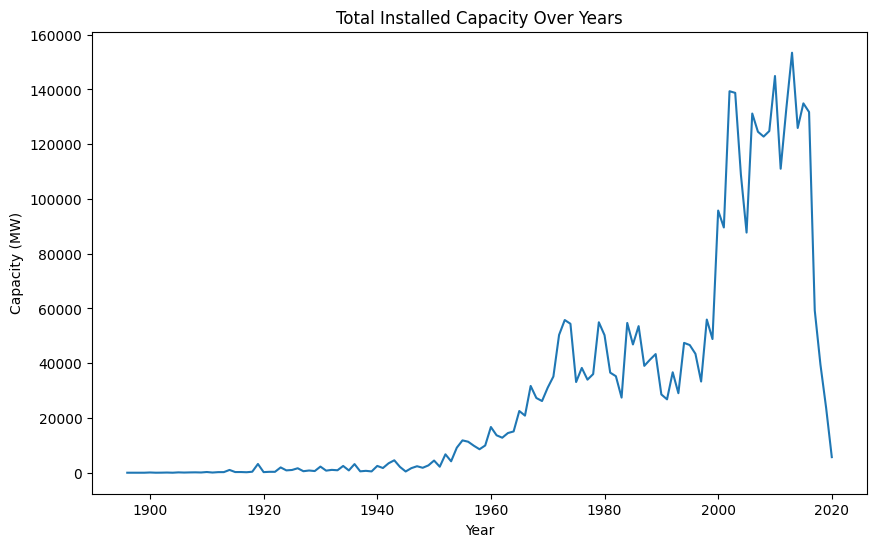

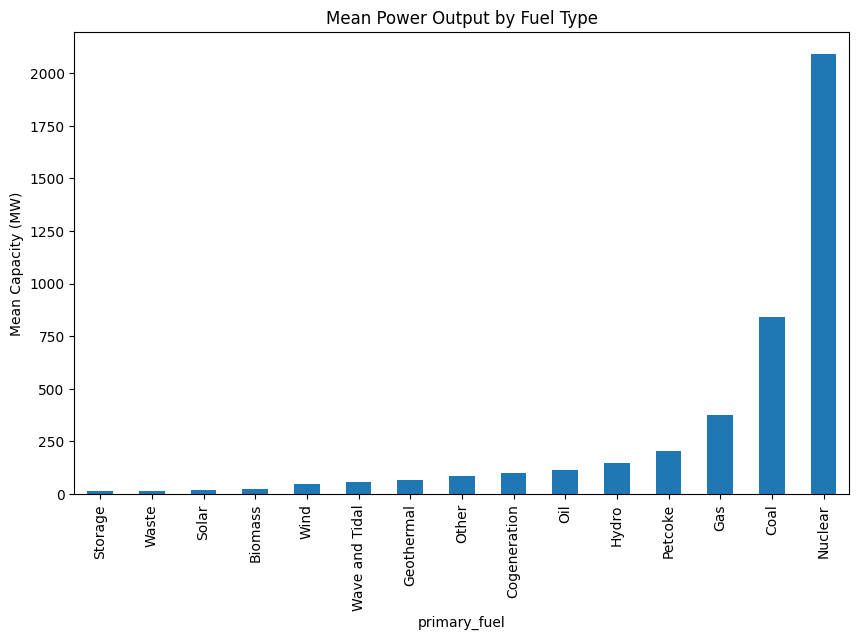

ValueError: Could not interpret value `fuel_type` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total capacity per year
plt.figure(figsize=(10,6))
capacity_per_year.plot()
plt.title('Total Installed Capacity Over Years')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.show()

# Plot fuel type distribution as a bar chart
plt.figure(figsize=(10,6))
mean_power_by_fuel.sort_values().plot(kind='bar')
plt.title('Mean Power Output by Fuel Type')
plt.ylabel('Mean Capacity (MW)')
plt.show()

# Optional: if lat/lon available - scatter plot map
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='longitude', y='latitude', hue='fuel_type', data=df, alpha=0.6)
    plt.title('Geographical Distribution of Power Plants')
    plt.show()


6. Matrix Operations in Real-World Context

In [45]:
# Create a matrix with numerical attributes (e.g., capacity, latitude, longitude)
matrix = df[['capacity_mw', 'latitude', 'longitude']].dropna().values

# Calculate covariance matrix
cov_matrix = np.cov(matrix, rowvar=False)
print("Covariance matrix:\n", cov_matrix)

# Eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eig_values)
print("Eigenvectors:\n", eig_vectors)


Covariance matrix:
 [[ 3.11541465e+05  1.08458462e+02  1.37279786e+04]
 [ 1.08458462e+02  4.51541026e+02 -1.58572789e+02]
 [ 1.37279786e+04 -1.58572789e+02  5.23949133e+03]]
Eigenvalues:
 [312155.53327127   4631.83168407    445.13204766]
Eigenvectors:
 [[ 9.99001122e-01  4.46372270e-02  2.06808470e-03]
 [ 3.24873832e-04  3.90248231e-02 -9.99238189e-01]
 [ 4.46839285e-02 -9.98240743e-01 -3.89713406e-02]]


In [46]:
import numpy as np

# Список уникальных типов топлива в данных
fuel_types = df['primary_fuel'].dropna().unique()

for fuel in fuel_types:
    print(f"\n--- Fuel type: {fuel} ---")
    subset = df[df['primary_fuel'] == fuel][['capacity_mw', 'latitude', 'longitude']].dropna()

    if len(subset) < 2:
        print("Недостаточно данных для анализа")
        continue

    matrix = subset.values

    # Ковариационная матрица
    cov_matrix = np.cov(matrix, rowvar=False)
    print("Covariance matrix:\n", cov_matrix)

    # Собственные значения и векторы
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    print("Eigenvalues:\n", eig_values)
    print("Eigenvectors:\n", eig_vectors)



--- Fuel type: Hydro ---
Covariance matrix:
 [[ 3.92858378e+05 -6.83150052e+02  7.57051164e+03]
 [-6.83150052e+02  6.77247524e+02 -1.17097082e+02]
 [ 7.57051164e+03 -1.17097082e+02  5.43924039e+03]]
Eigenvalues:
 [393007.4535658    5293.69266179    673.72015404]
Eigenvectors:
 [[ 0.99980774 -0.01956446  0.00130736]
 [-0.00174676 -0.02245877  0.99974624]
 [ 0.01953014  0.99955632  0.02248862]]

--- Fuel type: Gas ---
Covariance matrix:
 [[ 2.78186467e+05 -1.68787359e+02  7.39341121e+03]
 [-1.68787359e+02  2.38689696e+02 -3.54904375e+01]
 [ 7.39341121e+03 -3.54904375e+01  4.27854270e+03]]
Eigenvalues:
 [2.78385990e+05 4.07937157e+03 2.38337156e+02]
Eigenvectors:
 [[ 9.99636248e-01 -2.69669842e-02  3.92702953e-04]
 [-6.10046864e-04 -8.05187583e-03  9.99967397e-01]
 [ 2.69629430e-02  9.99603896e-01  8.06539806e-03]]

--- Fuel type: Oil ---
Covariance matrix:
 [[105378.01992736    320.87087285   4596.66894381]
 [   320.87087285    786.06144934   -577.48829676]
 [  4596.66894381   -577.4882

7. Integrating NumPy with Pandas and Matplotlib

Plants with capacity greater than mean + std:
                                                    name  capacity_mw
36                                        Hadjret Ennous       1200.0
49                                     Koudiet Eddraouch       1200.0
64                                   SKS IPP SNC Lavalin        815.0
68                                                 Terga       1200.0
95                                               ALICURA       1050.0
...                                                  ...          ...
34664  Ricardo Zuloaga (Tacoa) Thermal Power Plant Ve...       1720.0
34774                                           Hoa Binh       1920.0
34792                                           Lai Chau       1200.0
34860                                             Son La       2400.0
34922                                        Kafue Gorge        990.0

[1480 rows x 2 columns]


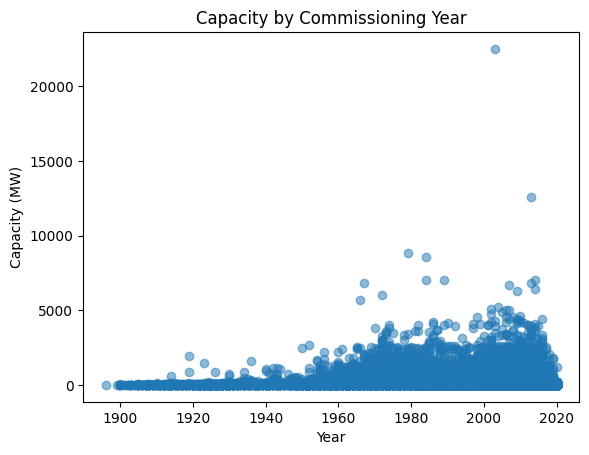

In [47]:
# Use NumPy for complex filtering: select plants with capacity > mean + std
mean_cap = df['capacity_mw'].mean()
std_cap = df['capacity_mw'].std()

# Boolean mask with NumPy
mask = np.array(df['capacity_mw']) > (mean_cap + std_cap)
filtered_df = df[mask]

print("Plants with capacity greater than mean + std:")
print(filtered_df[['name', 'capacity_mw']])

# Use NumPy arrays directly in Matplotlib plot
x = df['commissioning_year'].dropna().values
y = df['capacity_mw'].dropna().values

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.title('Capacity by Commissioning Year')
plt.show()
